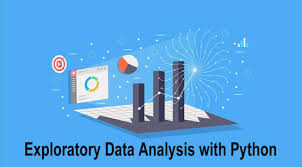

Welcome everyone to this notebook,this is my second notebook and in this I'm going to explain you about my own way of performing data analysis. The dataset I'm using is  campus placement dataset from kaggle.To say more about the process I can include that I'm going to use python language and libraries which i'm going to use are seaborn,numpy,pandas,matplotlib and scikit learn.

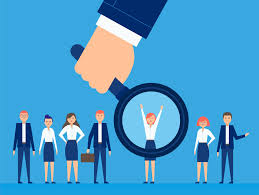

Data Analysis is all about finding some intersting insights in the data and we can find more insight by asking more questions and here I'm going to find some interesting insights in the data by asking the following questions:
1. To get placed in a company with high package which board should I choose (Central or State board) in 12th?
2. To get placed in a company with high package which board should I choose (Central or State board) in 10th?
3. Who is getting more placements girls or boys?
4. Are the students who are doing well in 10th , doing good in 12th?
5. Does the degree percentage plays important role in getting good salary?
6. Who is mostly not getting placed?
7. Which stream students are getting more placed and which stream students are mostly not placed?
Finally we will create a machine learning model to perform predictive analysis
Let's Start----->

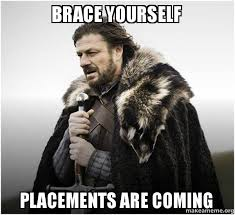

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
data = pd.read_csv('/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')

In [ ]:
data.head(5)

In [ ]:
data.info()

In [ ]:
data['salary'].fillna(0,inplace = True)

In [ ]:
def plot(data,x,y):
    plt.Figure(figsize =(10,10))
    sns.boxplot(x = data[x],y= data[y])
    g = sns.FacetGrid(data, row = y)
    g = g.map(plt.hist,x)
    plt.show()

# Who is getting more placements girls or boys?

In [ ]:
plot(data,"salary","gender")

From the above plot I can infer the following details:
<ol>
    <li>The Range of salary is high for boys with the median of 2.5 Lakhs per annum</li>
    <li>The Median salary for girls is 2.1 Lakhs per annum</li>
    <li>The highest package is offered to a boy which is nearly 10 Lakhs per annum</li>
    <li>The highest package offered for girls is 7 Lakhs per annum</li>
    <li>Total number girls not placed are 30 and Total number of boys not placed are 40</li>
</ol>

The Boys are getting more placements and the ratio of boys to girls(placements) is about 100:50, that can be seen from the plot given below:

In [ ]:
sns.countplot(data['status'],hue=data['gender'])

# To get placed in a company with high package which board should I choose (Central or State board) in 10th?

In [ ]:
plot(data,"salary","ssc_b")

From the above plot I can infer the following details:
<ol>
    <li>The Range of salary is high for central board students with the median of 2.5 Lakhs per annum</li>
    <li>The Median salary for other board students is 2.3 Lakhs per annum</li>
    <li>The highest package is offered to a central board student which is nearly 10 Lakhs per annum and as per our previous finding the student is a boy</li>
    <li>The highest package offered for other board students is 5 Lakhs per annum</li>
    <li>Total number central board students not placed are 27 and Total number of other board student not placed are 37</li>
</ol>

Better to choose central board but the ratio is 80:70 which infers thats both the board students are getting placed and ratio of student not getting placed is  35:25 here central board students are more, so the 10th board selection doesn't matters but if you want high package go for central board...(See the plot given below for more clarity)

In [ ]:
sns.countplot(data['status'],hue=data['ssc_b'])

# To get placed in a company with high package which board should I choose (Central or State board) in 12th?

In [ ]:
plot(data,"salary","hsc_b")

From the above plot I can infer the following details:
<ol>
<li>The Range of salary is high for central board students with the median of 2.5 Lakhs per annum</li>
    <li>The Median salary for other board students is 2.4 Lakhs per annum</li>
<li>The highest package is offered to a central board student which is nearly 10 Lakhs per annum and as per our previous finding the student is a boy and also his 10th board is central board</li>
    <li>The highest package offered for other board students is 7 Lakhs per annum</li>
<li>Total number central board students not placed are 25 and Total number of other board student not placed are 40</li>

Better to choose other board and ratio is 90:50 which infers thats the other board students are getting more placed and ratio of student not getting placed is 40:25 here central board students are less which infers that most of them will get offers.If you want high package go for central board...(See the plot given below for more clarity)

In [ ]:
sns.countplot(data['status'],hue=data['hsc_b'])

# Are the students who are doing well in 10th , doing good in 12th?

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data['ssc_p'], data['hsc_p'])
print('Pearsons correlation: %.3f' % corr)
sns.regplot(x='ssc_p',y='hsc_p',data = data)

The correlation is 0.51 which is not too strong but with the plot i can infer that those who performed well in 10th have performed well in 12th also and the outlier to this concept is very less and those whose scored less than 60 in 10th have continued the same in 12th and the student other than that two category have improved from 10th to 12th in point of marks

In [ ]:
sns.jointplot(x="degree_p",y="salary", data=data ,kind= "regplot")

In [ ]:
corr, _ = pearsonr(data['salary'], data['degree_p'])
print(corr)

The correlation is very less, so the degree percentage doesn't play a vital role in getting placements or in otherwords if you have enough skills with average percentage surely you will be placed,as in the plot above we can see that the highest package is offerred to student with 65 percent not to the student with 90 percent

<h1>Plotting the Relationships between numerical columns </h1>

In [ ]:
sns.pairplot(data)

In [ ]:
plt.figure(figsize =(10,10))
sns.heatmap(data.corr())

In [ ]:
list1 =[]
cor = data.corr()
for i in cor.columns:
    for j in cor.columns :
        if abs(cor[i][j])>0.5 and i!=j:
            list1.append(i)
            list1.append(j)
print(set(list1))
            

Highly correlated columns are:
{'salary', 'ssc_p', 'degree_p', 'hsc_p'}


# Who is mostly not getting placed?

In [ ]:
sns.catplot(x="status", y="ssc_p", data=data,kind="swarm",hue='gender')
sns.catplot(x="status", y="hsc_p", data=data,kind="swarm",hue='gender')
sns.catplot(x="status", y="degree_p", data=data,kind="swarm",hue='gender')

The students who have scored less than 60 percent in 10th or 12th or degree are mostly not getting placed because they don't even have basic eligibility(more than 60 percent in 10th,12th and degree)

# Which stream students are getting more placed and which stream students are mostly not placed?

In [ ]:
sns.violinplot(x="degree_t", y="salary", data=data)
sns.stripplot(x="degree_t", y="salary", data=data,hue='status')

The stream in which the students mostly get placed are Commucation and management , also science and technology students are mostly getting placed and other stream students are not getting that much placements due to less number of students...

Getting the important columns for predictive analysis

In [ ]:
columns_needed =['gender','ssc_p','ssc_b','hsc_b','hsc_p','degree_p','degree_t']
data_x = data[columns_needed]

In [ ]:
data_x.info()

# Category values to numerical values(Conversion)

In [ ]:
def cat_to_num(data_x,col):
    dummy = pd.get_dummies(data_x[col])
    del dummy[dummy.columns[-1]]#To avoid dummy variable trap
    data_x= pd.concat([data_x,dummy],axis =1)
    return data_x

In [ ]:
for i in data_x.columns:
    if data_x[i].dtype ==object:
        print(i)
        data_x =cat_to_num(data_x,i)

In [ ]:
data_x.drop(['gender','ssc_b','hsc_b','degree_t'],inplace =True,axis =1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['status'] = le.fit_transform(data['status'])

In [ ]:
y = data['status']
x = data_x

In [ ]:
x.info()

In [ ]:
y.value_counts()

# Splitting data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(x,y,test_size=0.2)

# Status Predicition for students(Without using salary feature) 

# Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
model = DTC()
model.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,model.predict(X_test)))

# **Congratulations!!! our model is Really Good ....

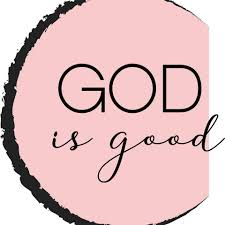

In [ ]:
model.predict(X_test)

In [ ]:
ax1 = sns.distplot(y_test,hist=True,kde =False,color ="r",label ="Actual Value")
sns.distplot(model.predict(X_test),color ="b",hist = True,kde =False, label = "Preicted Value",ax =ax1)

As our model is 88 percent accurate, difference between the bars is very low(the blue space in first bar and pink space in second bar)

In [ ]:
!pip install pydotplus

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
plt.figure(figsize=(100,70))
Image(graph.create_png())

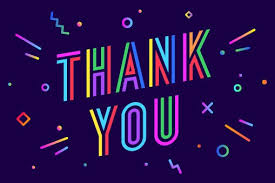

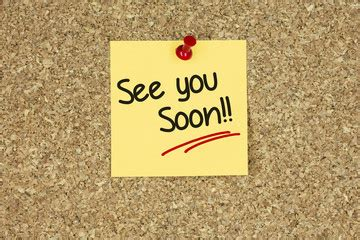

*Hope you would have learned something from kernal...Please upvote my kernal and also have a look at my other kernals....Your support mean a lot to me!!!*

Link to the dataset:https://www.kaggle.com/benroshan/factors-affecting-campus-placement<br/>
My Github account:https://github.com/ranjith28100<br/>
My Kaggle account:https://www.kaggle.com/granjithkumar